# Lista 2
### NCG-040 - Introdução à Visão Computacional


`Nome: `Pedro Henrique Gomes Peixoto Januario

`DRE: ` 119042303

### 0) Setup

Para esta lista, vamos usar o Numpy, PyPlot, OpenCV e Random. Use a célula abaixo para importar as bibliotecas.

In [ ]:
import cv2, random
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

Abaixo, uma função pronta para adicionar ruído do tipo salt & pepper. Você irá precisar dela na questão 2.

In [ ]:
def sp_noise(image, prob):
    output = np.zeros(image.shape,np.uint8)
    thres = 1 - prob 
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            rdn = random.random()
            if rdn < prob:
                output[i][j] = 0
            elif rdn > thres:
                output[i][j] = 255
            else:
                output[i][j] = image[i][j]
    return output

### 1) Suavização de Imagens (Blur)

A suavização de imagens (Blurring) é útil na remoção de ruídos e diminuição de detalhes de uma imagem para facilitar o processamento de sistemas de Visão Computacional

a) Na célula abaixo, há um código que cria um retângulo "oco", execute a célula;

b) Na célula em branco, crie uma cópia do retângulo para cada tipo de blur com a respectiva função do OpenCV aplicada para:

b1) Média, b2) Mediana e b3) Gaussiana com ksize = 15;

c) Plote os resultados

Dica: Use plt.subplot para visualizar todos os resultados lado a lado, sem precisar de novas células.


In [ ]:
retangulo = np.zeros((200,200), np.uint8)
cv2.rectangle(retangulo, (40,40), (160,160), 255, -2)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [ ]:
blurAvg = cv2.blur(retangulo,ksize=(15,15))
blurMedian = cv2.medianBlur(retangulo,ksize=15)
blurGaussian = cv2.GaussianBlur(retangulo,(15,15),19)

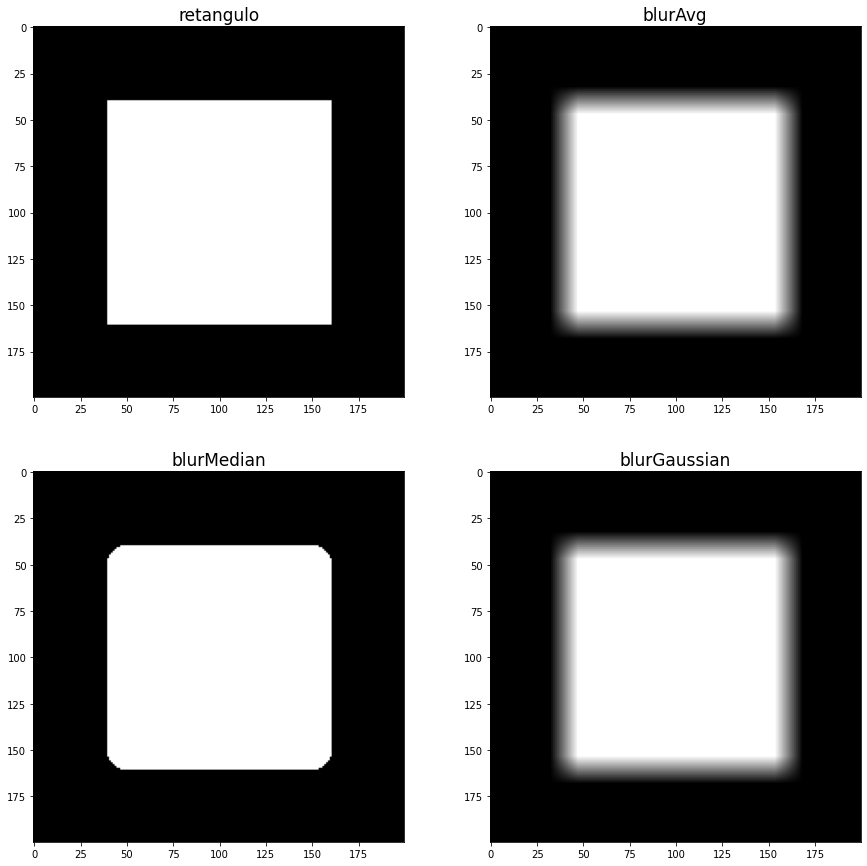

In [ ]:
fig,axes = plt.subplots(2,2,figsize=(15,15))
blurList = ["retangulo","blurAvg","blurMedian","blurGaussian"]
for (ax,blur) in zip(axes.ravel(),blurList):
  ax.imshow(eval(blur),cmap='gray')
  ax.set_title(blur,{'fontsize':17})


### 2) Thresholding

O thresholding, ou binarização ou limiarização é um processo de segmentação de imagens que se baseia na diferença dos níveis de cinza que compõe diferentes objetos de uma imagem. A partir de um limiar (threshold) estabelecido de acordo com as características dos objetos que se quer isolar, a imagem pode ser segmentada em dois grupos: o grupo de pixels com níveis de cinza abaixo do limiar e o grupo de pixels com níveis de cinza acima do limiar. Em uma imagem limiarizada, atribui-se um valor fixo para todos os pixels de mesmo grupo. 

a) Crie uma cópia do retângulo, chamada retangulo_ruidoso, para tal, use a função sp_noise criada anteriormente, atribua um valor de 0.05 como parâmetro.

b) Experimente combinações de Blur e Thresholding para limpar a imagem de ruídos

c) Plote os resultados

d) Comente os resultados

Boa sorte!

In [ ]:
retangulo_ruidoso = sp_noise(retangulo,0.05)


### Combinacao 1:

Text(0.5, 1.0, 'Retangulo Ruidoso Original')

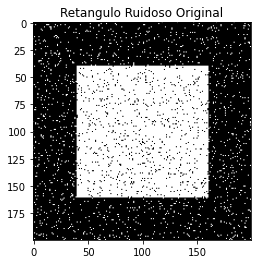

In [ ]:
plt.imshow(retangulo_ruidoso,cmap='gray')
plt.title('Retangulo Ruidoso Original')

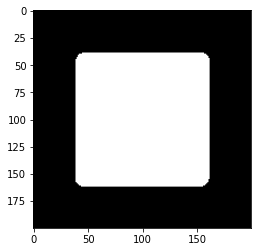

In [ ]:
ruidoGaussiano = cv2.GaussianBlur(retangulo_ruidoso,ksize=(13,13),sigmaX=5)
req,imgthresh_gaussian = cv2.threshold(ruidoGaussiano,ruidoGaussiano.std(),255,cv2.THRESH_BINARY)
plt.imshow(imgthresh,cmap='gray')


Combinacao boa, Gaussiana de ksize=13, sigma=5, threshold no desvio padrao da imagem c blur

### Combinacao 2:

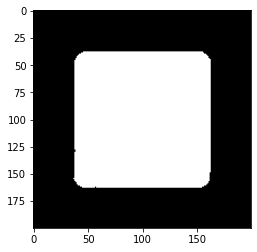

In [ ]:
ruidoAvg = cv2.blur(retangulo_ruidoso,(13,13))
_, imgthreshAvg = cv2.threshold(ruidoAvg,ruidoGaussiano.mean(),255,cv2.THRESH_BINARY)
plt.imshow(imgthreshAvg,cmap='gray')

Average Blur de ksize 13 usando justamente a Average do array como Threshold, pois nada mais justo. Resultados nao tao otimos quanto a combinacao anterior, mas significativa parte dos ruidos foi retirada. 

### Combinacao 3:

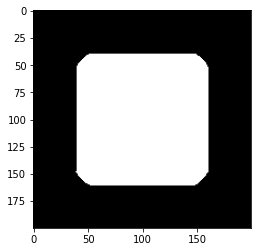

In [ ]:
ruidoMedian = cv2.medianBlur(retangulo_ruidoso,25)
_, imgthreshMedian = cv2.threshold(ruidoMedian,np.median(ruidoMedian),255,cv2.THRESH_BINARY)
plt.imshow(imgthreshMedian,cmap='gray')

Combinacao de threshold e medianBlur com ksize 25 usando a mediana como threshold. Resultado OK embora em todas as combinacoes o quadrado virou um octagono.